# Bank Customer Churn EDA & Feature Engineering

**Dataset link**: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

## Importing and reading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 20)
# pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Data Understanding

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

data variables info :

- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

In [6]:
df.isnull().sum()

#There are no null/missing values

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [7]:
# checking for duplicated values
print(f"There are {df.duplicated().sum()} duplicated rows")

There are 0 duplicated rows


In [8]:
# removing unnecessary columns

df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## EDA

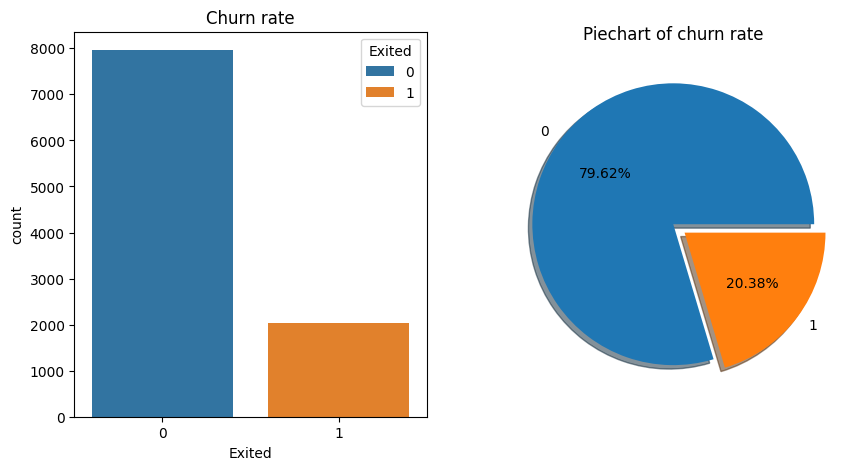

In [10]:
# Lets see the churn rate through visualizations

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Exited', hue='Exited')
plt.title("Churn rate")

plt.subplot(1,2,2)
plt.pie(x=df['Exited'].value_counts().values, labels=df['Exited'].value_counts().index, autopct='%.2f%%', explode=[0,0.1], shadow=True)
plt.title("Piechart of churn rate")
plt.show()

Observation:

- The observed churn/exit percentage of 20.38% appears to be relatively high.
- 70.62% of customers are non-churner

**need to find out the reasons for churning of customers**

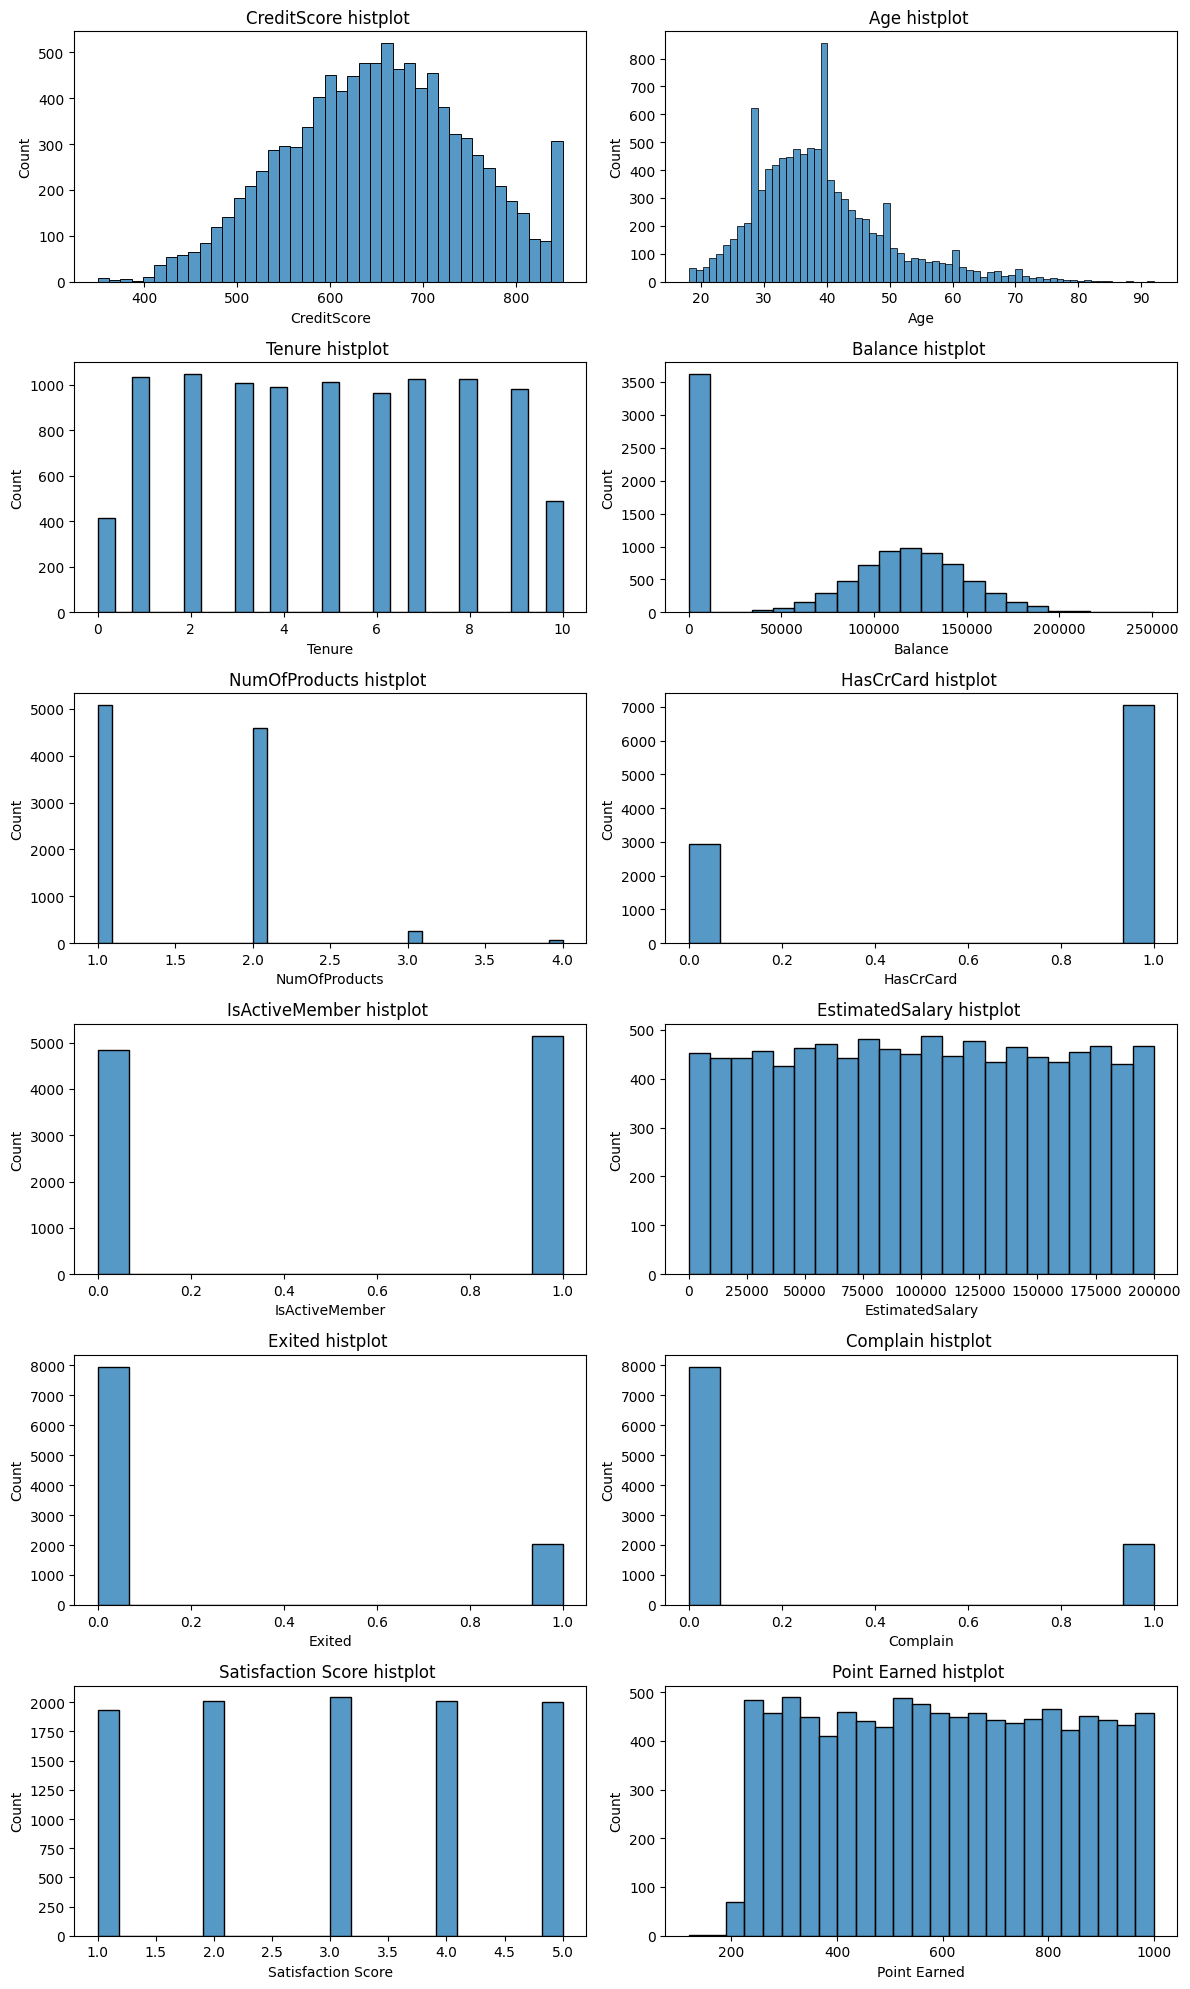

In [11]:
# lets check the histplot
plt.figure(figsize=(12, 20))
for i,feature in enumerate(df.select_dtypes(include='number')):
    plt.subplot(6,2,i+1)
    sns.histplot(data=df, x=feature)
    plt.title(feature+" histplot ")
    plt.tight_layout()
    
plt.show()

Observation:

- Creditscore, Age, Balance seem to have proper distribution pattern
- The majority of Creditscore values fall within the range of 600 to 720
- most numbers of customers are from age 30 - 40
- A significant portion of customers have a zero balance, which requires further investigation
- The majority of customers possess credit cards


**need to focus on age, Balance and creditscore**

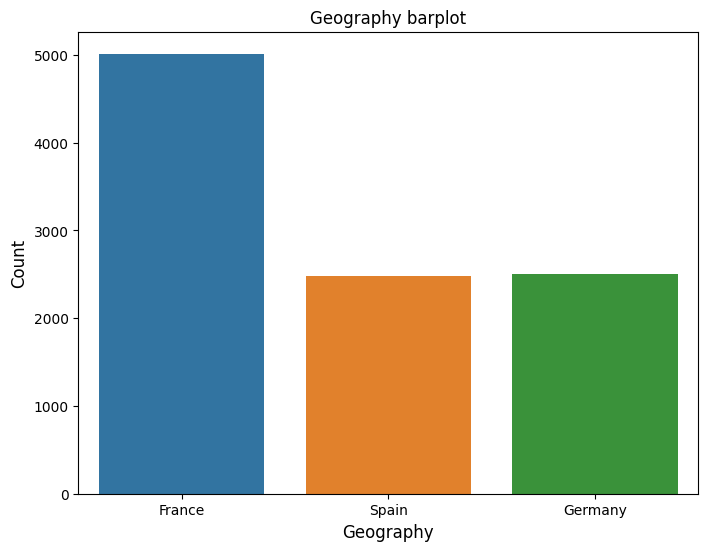

The value counts of Geography is
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64





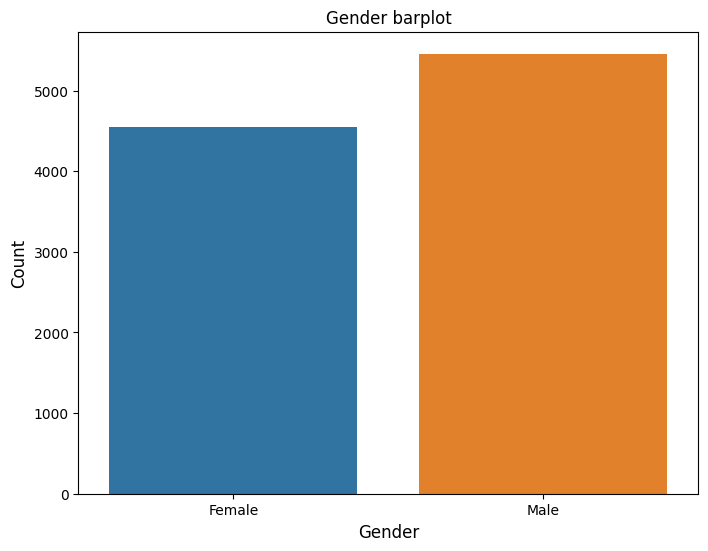

The value counts of Gender is
Gender
Male      5457
Female    4543
Name: count, dtype: int64





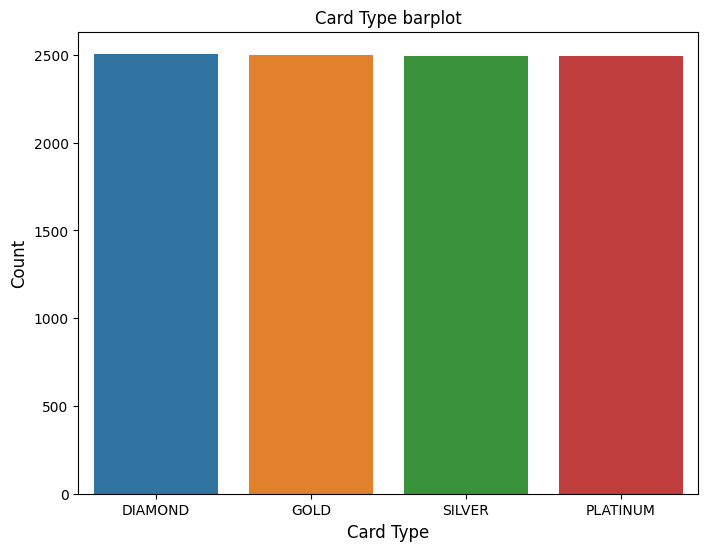

The value counts of Card Type is
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64





In [12]:
# getting object datatype cols

obj_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']

#plotting obj columns
for obj in obj_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=obj, hue=obj)
    plt.title(obj+" barplot")
    plt.xlabel(obj, fontdict={'fontsize': 12})
    plt.ylabel("Count", fontdict={'fontsize': 12})
    plt.show()

    counts = df[obj].value_counts()
    print(f"The value counts of {obj} is")
    print(counts)
    print("\n\n")

observation:

- Customers from France are more in numbers, whereas customers from spain and germany are appearing to be equivalent.
- Male customers are more in numbers than female customers
- Card type plot doesn't give much insight as each type is roughly equivalent


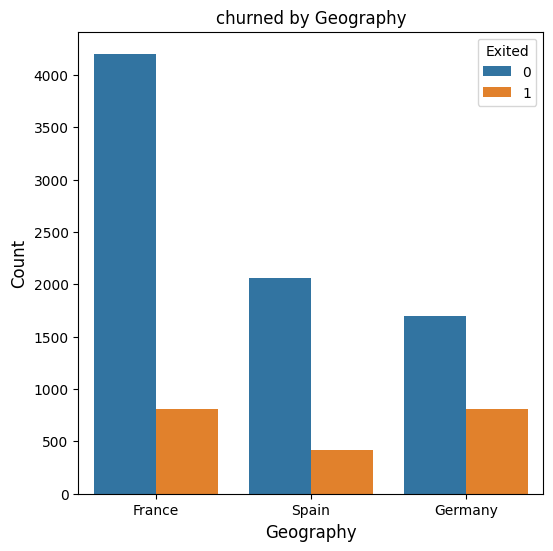

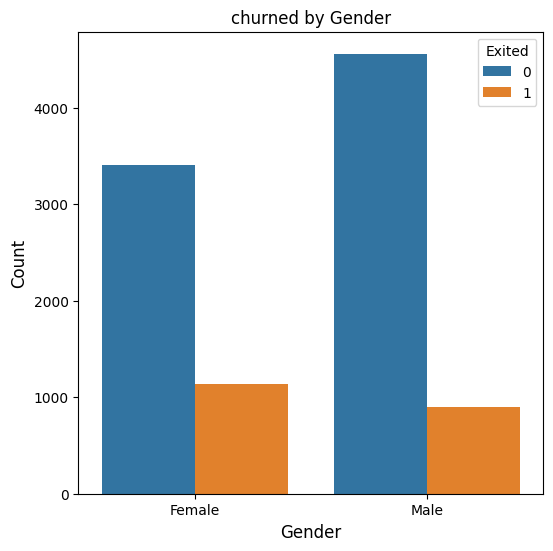

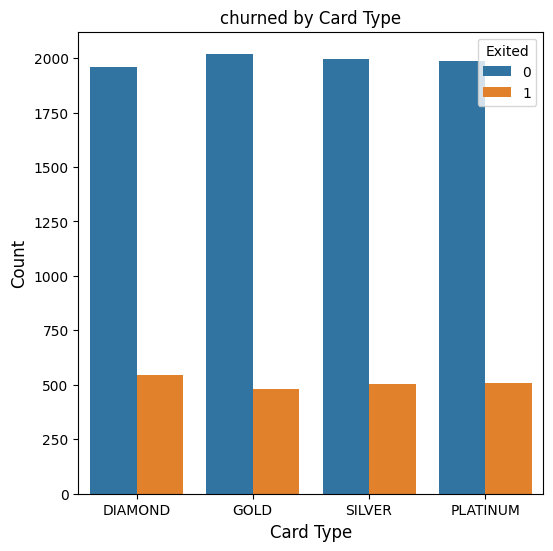

In [13]:
# Let's analyze the same plots with churned rates

for obj in obj_cols:
    plt.figure(figsize=(6, 6))
    sns.countplot(data=df, x=obj, hue='Exited')
    plt.title("churned by "+obj)
    plt.xlabel(obj, fontdict={'fontsize': 12})
    plt.ylabel("Count", fontdict={'fontsize': 12})
    plt.show()

obs:

- Churners from Germany and Spain appear to be roughly equal in number and more compared to spain
- Female churners outnumber male churners
- Card Type does not appear to be a significant factor in churn rates

In [14]:
# let's get all the continuos features

cont_features = ["CreditScore","Age","Balance","EstimatedSalary","Point Earned"]

In [15]:
category_features = [feature for feature in df.columns.tolist() if feature not in cont_features]
category_features

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type']

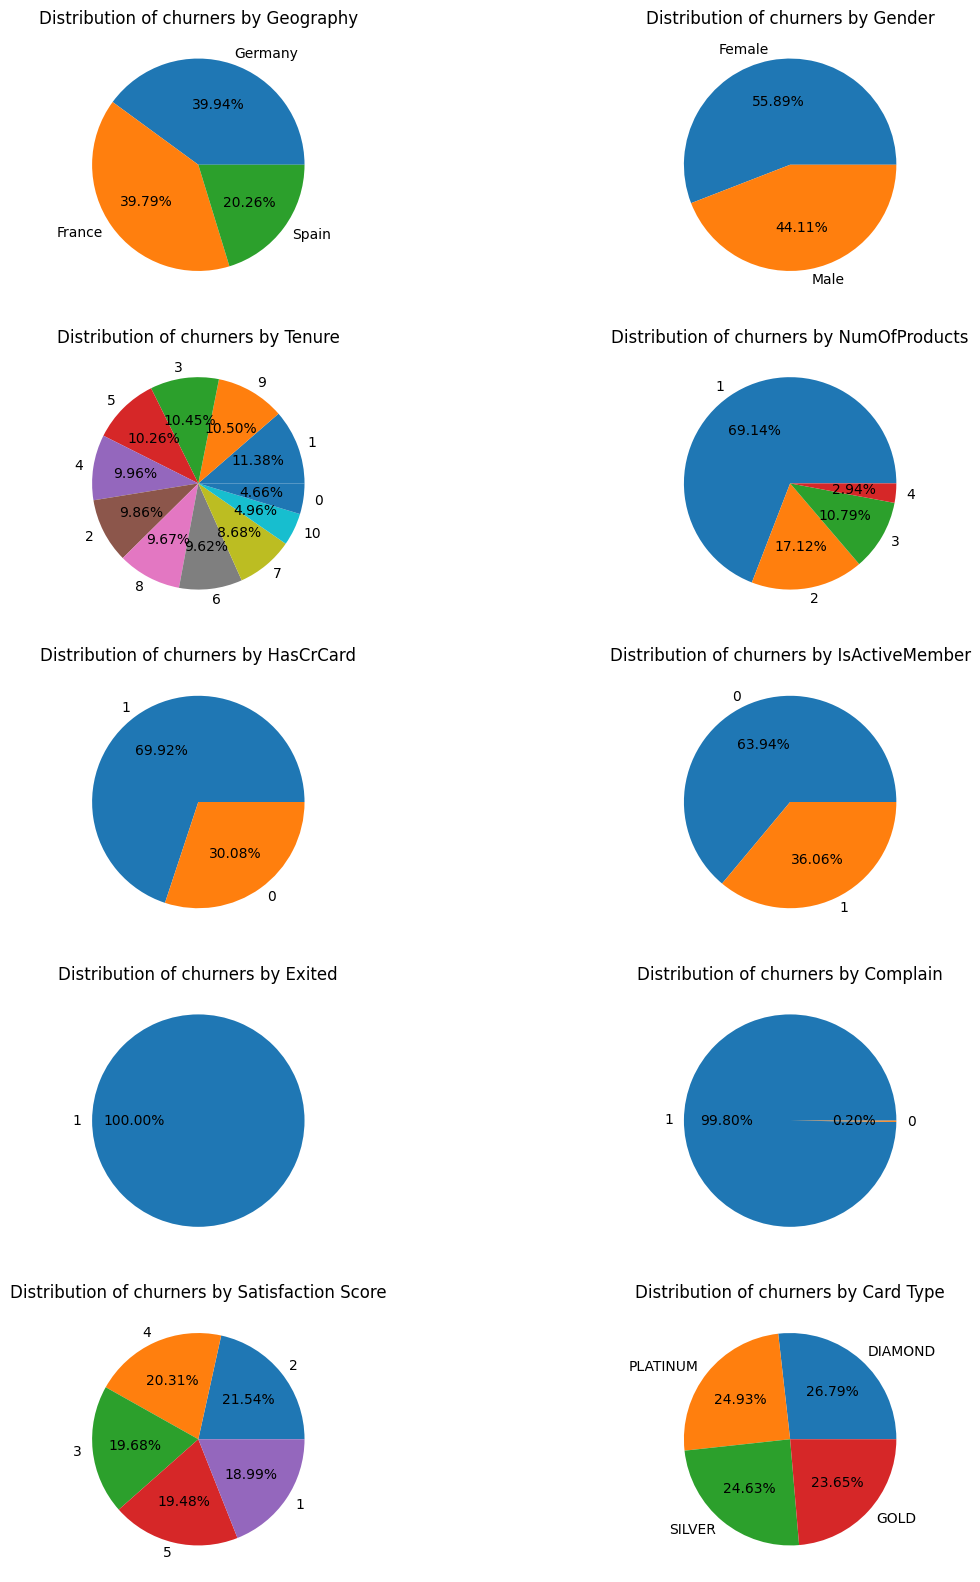

In [16]:
# Let's see the percentage of churners from different categories thorugh pie chart
# What percentage of all churners belong to this category?
# Note: here I'm using filtered dataset of 'Exited' == 1 i.e. only churners so the
# pie plot shows the distribution among churners , so we can identfy in which categories churner 
# rate is high.

Exited_df = df[df['Exited'] == 1] # getting only exited == 1 DF
plt.figure(figsize=(14, 20))
for i,feature in enumerate(category_features):
    plt.subplot(5, 2, i+1)
    plt.pie(x=Exited_df[feature].value_counts().values, 
            labels=Exited_df[feature].value_counts().index, 
            autopct='%.2f%%')
    plt.title("Distribution of churners by "+feature)
plt.show()

In [17]:
# let's check for outliers in continuos features usind MAD
from scipy import stats
def z_score(series):
    median = series.median()
    mad = stats.median_abs_deviation(series, scale='normal')
    return 0.6745 * (series - median) / mad

for feature in cont_features:
    zscore = z_score(df[feature])
    outliers = df[abs(zscore) > 3]

    print(feature)
    print(f"the number of outliers: {outliers.shape[0]}")

CreditScore
the number of outliers: 0
Age
the number of outliers: 34
Balance
the number of outliers: 0
EstimatedSalary
the number of outliers: 0
Point Earned
the number of outliers: 0


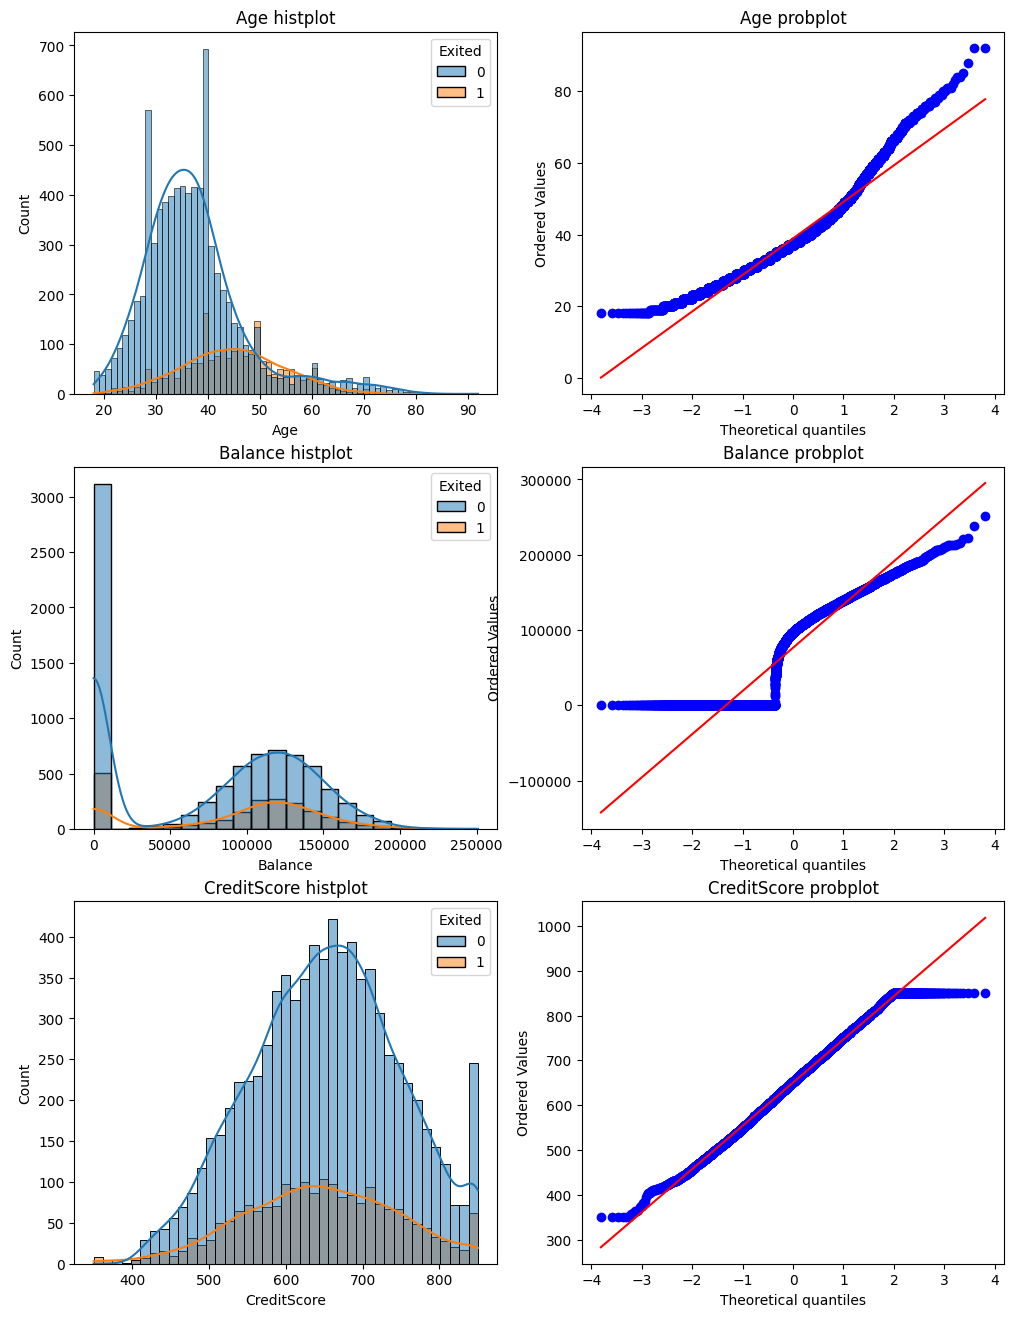

In [18]:
# let's plot the Q-Q plot of continuos variables

from scipy.stats import probplot
plt.figure(figsize=(12, 16))
plt.subplot(3, 2, 1)
sns.histplot(data=df, x='Age', kde=True, hue='Exited')
plt.title("Age histplot")
plt.subplot(3,2,2)
probplot(df['Age'], dist='norm', plot=plt)
plt.title("Age probplot")
#
plt.subplot(3, 2, 3)
sns.histplot(data=df, x='Balance', kde=True, hue='Exited')
plt.title("Balance histplot")
plt.subplot(3,2,4)
probplot(df['Balance'], dist='norm', plot=plt)
plt.title("Balance probplot")
#
plt.subplot(3, 2, 5)
sns.histplot(data=df, x='CreditScore', kde=True, hue='Exited')
plt.title("CreditScore histplot")
plt.subplot(3,2,6)
probplot(df['CreditScore'], dist='norm', plot=plt)
plt.title("CreditScore probplot")
plt.show()

observation:

- **The Age probplot exhibits slight positive skewness, deviating from a normal distribution**
- **There is issue with Balance feature because it has significant amount of '0' balance**
- **Creditscore closely aligns with probplot line, except it has some peak, slightly negatively skew**

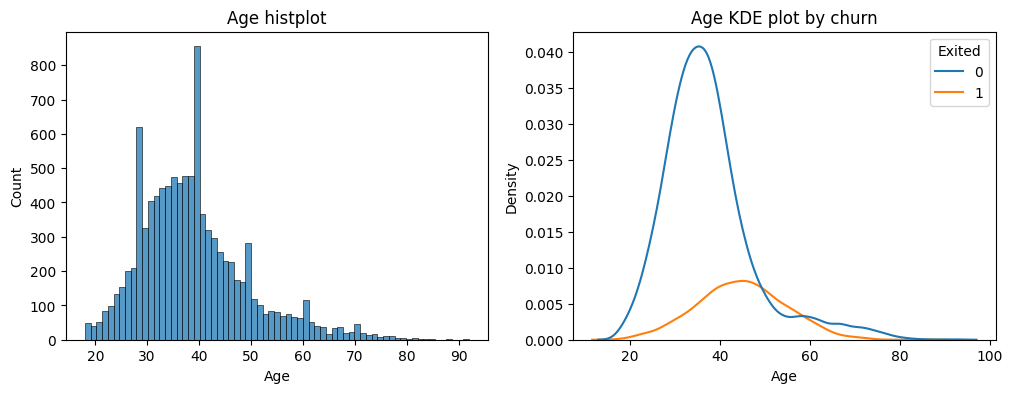

In [19]:
# let's see the hist and kde plot together

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Age')
plt.title("Age histplot")
plt.subplot(1,2,2)
sns.kdeplot(data=df, x='Age', hue="Exited")
plt.title("Age KDE plot by churn")
plt.show()

- **Churn rate seems more in customers from age 38 - 50**

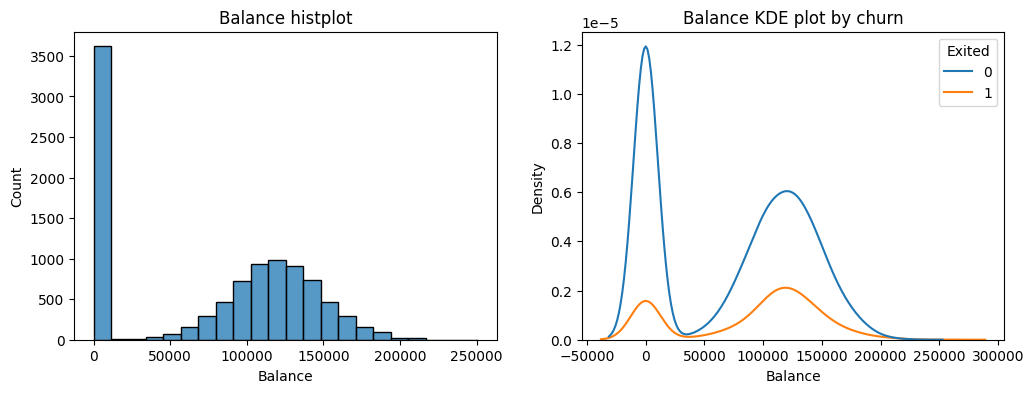

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Balance')
plt.title("Balance histplot")
plt.subplot(1,2,2)
sns.kdeplot(data=df, x='Balance', hue="Exited")
plt.title("Balance KDE plot by churn")
plt.show()

- **The churn rate of customers is low despite having 0 balance**
- **It is high where the balance is more than 100K or less than 150k**

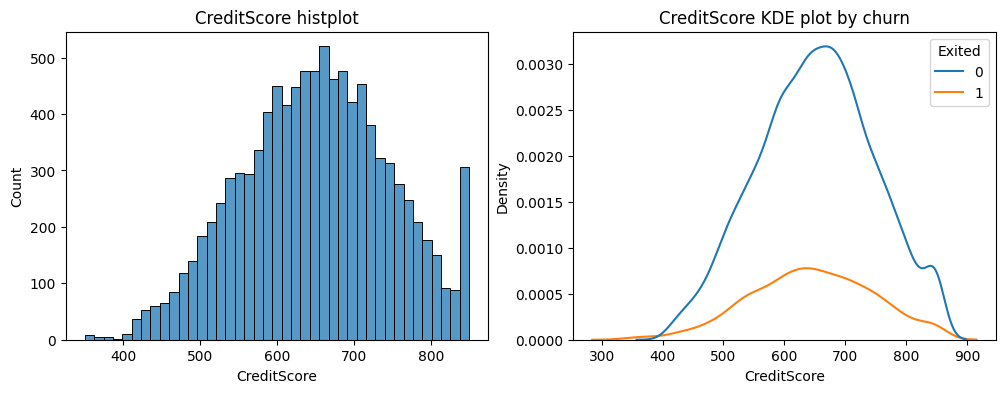

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='CreditScore')
plt.title("CreditScore histplot")
plt.subplot(1,2,2)
sns.kdeplot(data=df, x='CreditScore', hue="Exited")
plt.title("CreditScore KDE plot by churn")
plt.show()

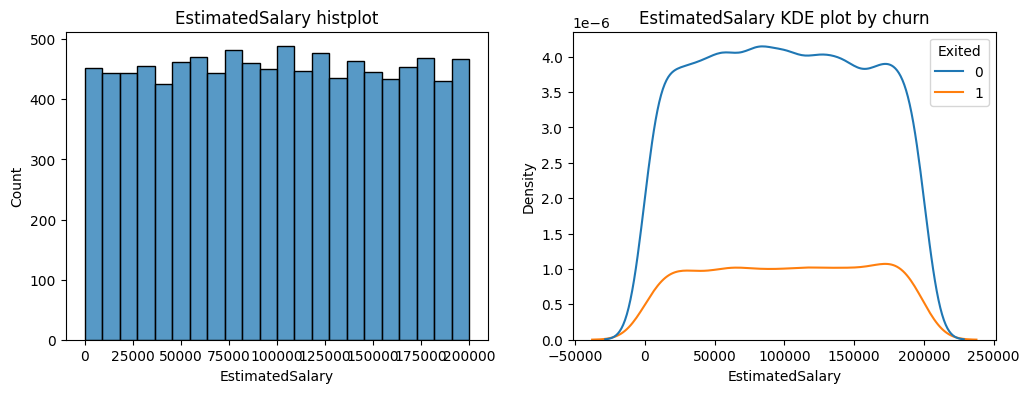

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='EstimatedSalary')
plt.title("EstimatedSalary histplot")
plt.subplot(1,2,2)
sns.kdeplot(data=df, x='EstimatedSalary', hue="Exited")
plt.title("EstimatedSalary KDE plot by churn")
plt.show()

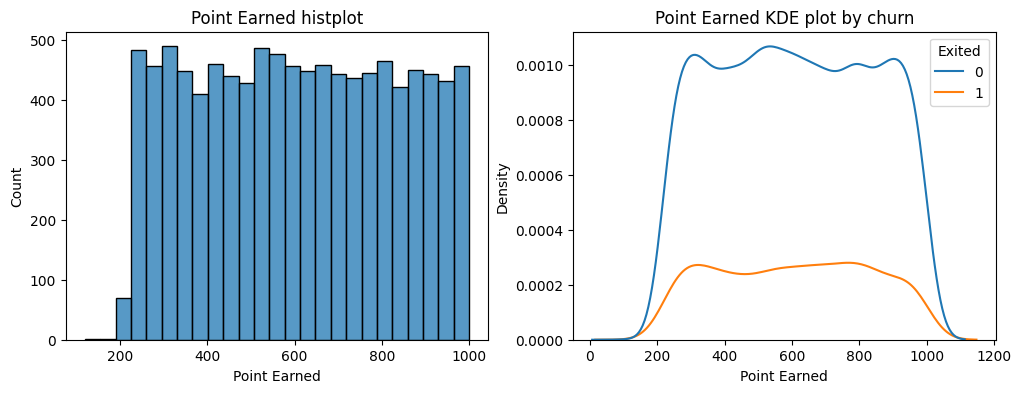

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Point Earned')
plt.title("Point Earned histplot")
plt.subplot(1,2,2)
sns.kdeplot(data=df, x='Point Earned', hue="Exited")
plt.title("Point Earned KDE plot by churn")
plt.show()

- **Estimated Salary and Point Earned seems to be bimodal distribution**
- **two distinct groups in Estimated salary more likely to churn**
- **In point earned also there seems to be two distinct groups with high churn rate**

In [24]:
# let's analyze the 0 balance customers

zero_balance_cust = df[df['Balance'] == 0]
zero_balance_count = zero_balance_cust.shape[0]

print(f"Total numbers of customers - {len(df)}")
print(f"The number of cutomers with zero balance - {zero_balance_count}")
print(f"The percentage of cutomers with zero balance - {zero_balance_count/len(df) * 100:.2f}%")

churn_count_zerobal = zero_balance_cust[zero_balance_cust['Exited'] == 1].shape[0]
print(f"Number of churn customers with zero balace - {churn_count_zerobal}")

# percentage of filtered dataset
zero_bal_percent = churn_count_zerobal / zero_balance_count * 100
print(f"percentage of churned customers with zero balance(filtered DF) {zero_bal_percent:.2f}%")

# percentage from overall dataset
zero_bal_percent_overall = churn_count_zerobal / len(df) * 100
print(f"percentage of churned customers with zero balance(overall DF) {zero_bal_percent_overall}%")

Total numbers of customers - 10000
The number of cutomers with zero balance - 3617
The percentage of cutomers with zero balance - 36.17%
Number of churn customers with zero balace - 500
percentage of churned customers with zero balance(filtered DF) 13.82%
percentage of churned customers with zero balance(overall DF) 5.0%


In [25]:
# The 36.17% of customers are having zero balance which is a significant amount
# but the churn amount is low whose balance is 0|

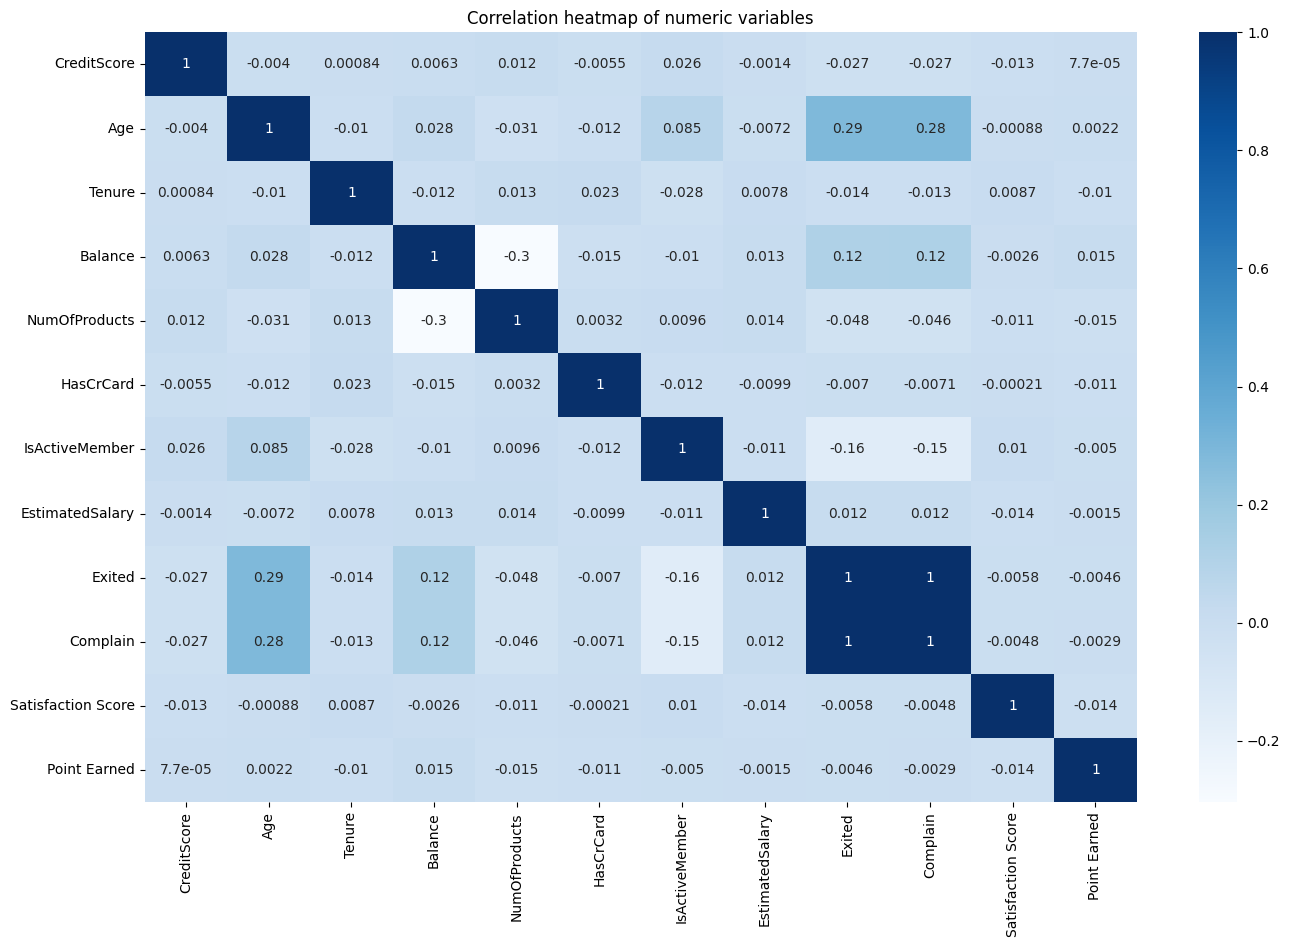

In [26]:
# checking the correlation heatmap

plt.figure(figsize=(16, 10))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation heatmap of numeric variables")
plt.show()

In [27]:
new_df = df.drop(columns=['Complain'])

In [28]:
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


## Feature Engineering

In [29]:
new_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [30]:
obj_cols

['Geography', 'Gender', 'Card Type']

In [31]:
# getting dummies by pd.get_dummies

for obj in obj_cols:
    dummies = pd.get_dummies(new_df[obj], prefix=obj, dtype=int) 
    new_df = pd.concat([new_df.drop(obj, axis=1), dummies], axis=1)

new_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,1,0,0,1,0,0


In [33]:
# Splitting tran, test data

from sklearn.model_selection import train_test_split

X = new_df.drop(columns=['Exited'])
y = new_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 19) (8000,)
(2000, 19) (2000,)


## feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_transf = scaler.fit_transform(X_train)
X_test_transf = scaler.transform(X_test)

In [36]:
y_test.value_counts()

Exited
0    1592
1     408
Name: count, dtype: int64